In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster.bicluster import SpectralCoclustering

whiskey = pd.read_csv('whiskies.txt')
whiskey['Region'] = pd.read_csv('regions.txt')
whiskey.head()

In [ ]:
flavors = whiskey.iloc[:, 2:14]
flavors

In [ ]:
corr_flavors = pd.DataFrame.corr(flavors)

In [ ]:
corr_flavors

In [ ]:
corr_flavors.style.applymap(lambda x: 'background: red' if x > .3 else "")

In [ ]:
plt.figure(figsize=(10,10));
plt.pcolor(corr_flavors);
plt.colorbar();

In [ ]:
corr_whiskey = pd.DataFrame.corr(flavors.transpose())

plt.figure(figsize=(10,10));
plt.pcolor(corr_whiskey);
plt.colorbar();

In [ ]:
# Co-clustering
model = SpectralCoclustering(n_clusters=6, random_state=0)

In [ ]:
model.fit(corr_whiskey)

In [ ]:
np.sum(model.rows_, axis=1)

In [ ]:
whiskey['Group'] = pd.Series(model.row_labels_, index=whiskey.index)

In [ ]:
whiskey = whiskey.ix[np.argsort(model.row_labels_)]

In [ ]:
whiskey = whiskey.reset_index(drop=True)

In [ ]:
correlations = pd.DataFrame.corr(whiskey.iloc[:,2:14].transpose())

In [ ]:
correlations = np.array(correlations)

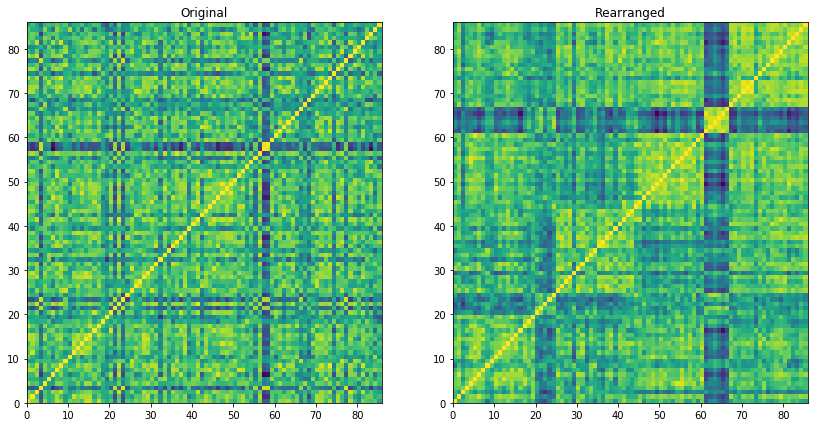

In [36]:
plt.figure(figsize= (14,7))
plt.subplot(121)
plt.pcolor(corr_whiskey)
plt.title("Original")
plt.axis('tight')
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.axis('tight')
plt.show()